In [48]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
headers=['Interval','Timestamp','Flume Depth (mm)','AV Flow (L/s)', 'Flume Flow (L/s)', 'Precipitation (mm)']
df = pd.read_csv ('sani_clean.csv', names=headers)
df=df[1:]
# df=df.astype(float)
df=df[['Interval','Timestamp','Flume Depth (mm)','Flume Flow (L/s)','Precipitation (mm)','AV Flow (L/s)']]
df.head()

,Interval,Timestamp,Flume Depth (mm),Flume Flow (L/s),Precipitation (mm),AV Flow (L/s)
1,15 Min,2021-04-01 0:15,14.16,0.22,0,0.4
2,15 Min,2021-04-01 0:30,14.95,0.29,0,0.24
3,15 Min,2021-04-01 0:45,14.88,0.21,0,0.15
4,15 Min,2021-04-01 1:00,13.1,0.21,0,0.17
5,15 Min,2021-04-01 1:15,13.96,0.21,0,0.23


In [44]:
# SMAPE Metric
def smape(actual, forecast):
    result = 1/len(actual) * np.sum(2*np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast))*100)
    return result

In [46]:
def plot_predictions(actual, predicted, figsize, title):
    
    plt.figure(figsize=figsize)
    actual = plt.plot(actual, color='blue', label='Actual')
    predicted = plt.plot(predicted, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

In [40]:
# X = df[['Flume Depth (mm)','Flume Flow (L/s)','Precipitation (mm)']]
# y = df['AV Flow (L/s)']
# df=df[['Flume Depth (mm)','Flume Flow (L/s)','Precipitation (mm)','AV Flow (L/s)']].astype(float)
df=df['AV Flow (L/s)'].values

In [41]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

multi:softprob
reg:squarederror

In [73]:
def xgboost(data, estimators, visualize_predictions):
    
    # Split into training and testing
    # train = row[:-31].values
    # test = row[-31:].values
    train, test = train_test_split(data, test_size=0.3, shuffle=False)
    x_train, y_train = create_dataset(train.reshape(-1, 1))
    x_test, y_test = create_dataset(test.reshape(-1, 1))
    
    model = XGBRegressor(objective='reg:squarederror', n_estimators=estimators)
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_error = smape(y_train, train_pred)
    test_error = smape(y_test, test_pred)
    
    if visualize_predictions:
        plot_predictions(y_train, train_pred, figsize=(15, 4), title='Training Predictions')
        plot_predictions(y_test, test_pred, figsize=(15, 4), title='Testing Predictions')
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    
    return model

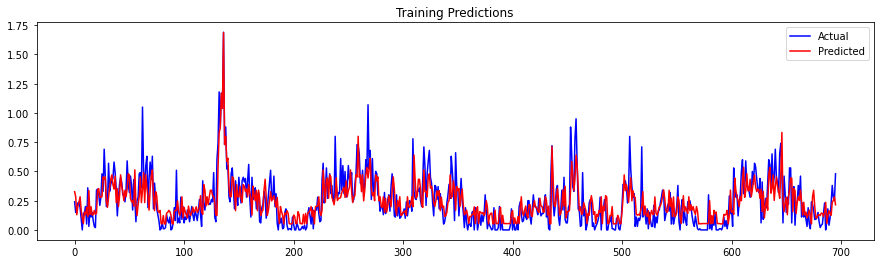

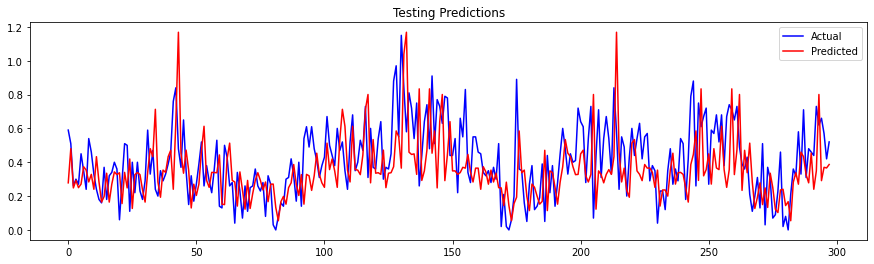

Train Error: 62.467705959018915 | Test Error: 50.553037371555


In [74]:
# row_xg = data.iloc[1, :]
model_xgb = xgboost(df, 2000, True)